In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("emp.csv")

In [4]:
data.info()
data.describe()
data['Attrition'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,count
Attrition,
No,1233
Yes,237


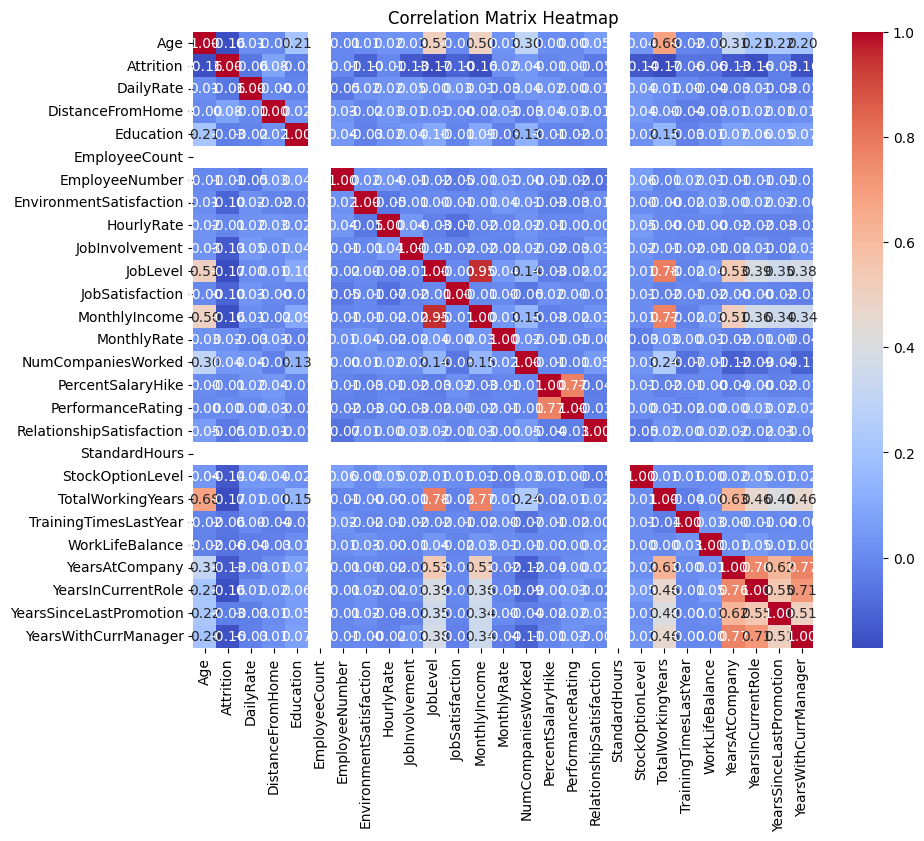

In [6]:
# Correlation matrix
# Convert 'Attrition' column to numeric if it contains 'Yes'/'No' values
if data['Attrition'].dtype == object and any(data['Attrition'].isin(['Yes', 'No'])):
    data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])

# Convert categorical columns
data = pd.get_dummies(data, drop_first=True)
from sklearn.model_selection import train_test_split
X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

print("Random Forest:\n", classification_report(y_test, rf.predict(X_test)))
print("Logistic Regression:\n", classification_report(y_test, lr.predict(X_test)))

Random Forest:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.67      0.21      0.31        39

    accuracy                           0.88       294
   macro avg       0.78      0.59      0.62       294
weighted avg       0.86      0.88      0.85       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Single array detected, plotting directly.


<Figure size 640x480 with 0 Axes>

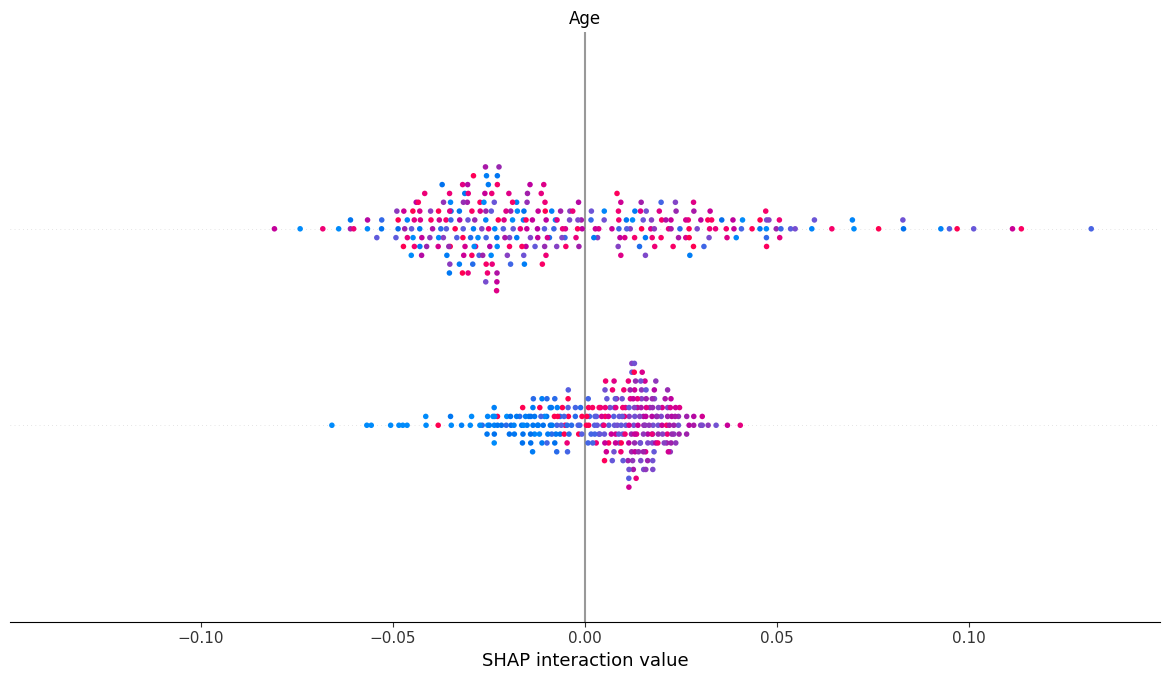

In [11]:
import shap

# Ensure test set is a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Tree explainer
explainer = shap.TreeExplainer(rf)

# Get SHAP values (single array for binary classification)
shap_values = explainer.shap_values(X_test_df)

# Check if it's a list or array
if isinstance(shap_values, list):
    print("Using shap_values[1] for class 1 (Attrition = Yes)")
    shap.summary_plot(shap_values[1], X_test_df)
else:
    print("Single array detected, plotting directly.")
    shap.summary_plot(shap_values, X_test_df)


The analysis aimed to understand and predict employee attrition. After exploring the dataset and relationships between variables, two models (Random Forest and Logistic Regression) were trained and evaluated. Both demonstrated good predictive performance. Further analysis using SHAP values revealed the key factors driving attrition, allowing for a deeper understanding of the model's predictions and informing potential strategies for employee retention. By identifying these key factors and assessing the predictive capabilities of the models, this work provides valuable insights for data-driven decision-making and tackling employee attrition within the organization.